In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

The main purpose of this notebook is to analyse the "coverage counts" and other summary files produced by deepTools.

In [3]:
cov_100ng_matrix = pd.read_table("50_deeptools_summary/coverage_all_aa_100ng.txt", skiprows=1)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [4]:
cov_100ng_matrix.columns = [
    c.replace("'", "").replace("-aa_DS_MD.bam", "")
    for c in cov_100ng_matrix.columns
]

In [5]:
cov_100ng_matrix.head()

,#chr,start,end,Kapa-100ng-1,Kapa-100ng-2,Kapa-100ng-3,Kapa-100ng-4,NEB-100ng-1,NEB-100ng-2,NEB-100ng-3,...,Nextera-100ng-3,Nextera-100ng-4,Quanta-100ng-1,Quanta-100ng-2,Quanta-100ng-3,Quanta-100ng-4,Swift2S-100ng-1,Swift2S-100ng-2,Swift2S-100ng-3,Swift2S-100ng-4
0,chr1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,chr1,3099,3100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,chr1,6198,6199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,chr1,9297,9298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,chr1,12396,12397,21.0,33.0,27.0,26.0,21.0,23.0,21.0,...,29.0,23.0,19.0,7.0,24.0,19.0,28.0,12.0,26.0,21.0


In [6]:
columns = cov_100ng_matrix.columns[3:]

In [7]:
columns = cov_100ng_matrix.columns[3:]
counts_matrix = cov_100ng_matrix.iloc[:, 3:].apply(pd.value_counts)
counts_long_100 = counts_matrix.reset_index().rename({'index': 'Coverage'}, axis=1).melt(id_vars=['Coverage'], value_name="NumReads")
counts_long_100['Kit'] = counts_long_100.variable.str.split("-").str.get(0)
counts_long_100['Replicate'] = counts_long_100.variable.str.split("-").str.get(2)

In [8]:
def reverse_cum_sum(df):
    cum = df.sort_values("Coverage", ascending=False).NumReads.cumsum()
    df['CumulativeNumReads'] = cum
    return df


counts_long_100 = counts_long_100.groupby(['Kit', 'Replicate']).apply(reverse_cum_sum)

In [9]:
counts_long_100.head()

,Coverage,variable,NumReads,Kit,Replicate,CumulativeNumReads
0,0.0,Kapa-100ng-1,68043.0,Kapa,1,1001412.0
1,1.0,Kapa-100ng-1,14940.0,Kapa,1,933369.0
2,2.0,Kapa-100ng-1,31478.0,Kapa,1,918429.0
3,3.0,Kapa-100ng-1,52056.0,Kapa,1,886951.0
4,4.0,Kapa-100ng-1,73145.0,Kapa,1,834895.0


In [10]:
counts_medium_100 = counts_long_100[counts_long_100.Coverage < 20]

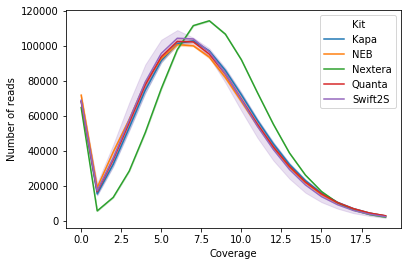

In [11]:
plt.figure()
sns.lineplot(x='Coverage', y='NumReads', hue='Kit', data=counts_medium_100)
plt.ylabel("Number of reads")
plt.savefig("presentation/coverage_deeptools_100ng.pdf")

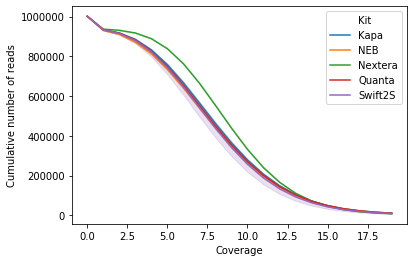

In [12]:
plt.figure()
sns.lineplot(x='Coverage', y='CumulativeNumReads', hue='Kit', data=counts_medium_100)
plt.ylabel("Cumulative number of reads")
plt.savefig("presentation/coverage_deeptools_cumulative_100ng.pdf")

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


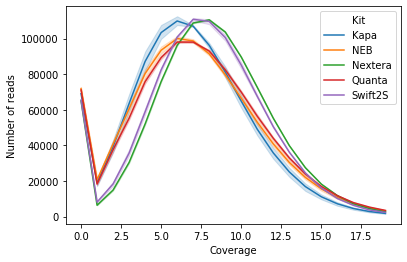

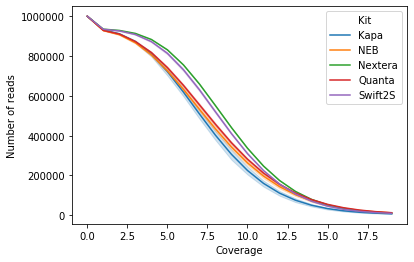

In [13]:
cov_10ng_matrix = pd.read_table("50_deeptools_summary/coverage_all_aa_10ng.txt", skiprows=1)
cov_10ng_matrix.columns = [
    c.replace("'", "").replace("-aa_DS_MD.bam", "")
    for c in cov_10ng_matrix.columns
]
columns = cov_10ng_matrix.columns[3:]
counts_matrix = cov_10ng_matrix.iloc[:, 3:].apply(pd.value_counts)
counts_long_10 = counts_matrix.reset_index().rename({'index': 'Coverage'}, axis=1).melt(id_vars=['Coverage'], value_name="NumReads")
counts_long_10['Kit'] = counts_long_10.variable.str.split("-").str.get(0)
counts_long_10['Replicate'] = counts_long_10.variable.str.split("-").str.get(2)
counts_long_10 = counts_long_10.groupby(['Kit', 'Replicate']).apply(reverse_cum_sum)
counts_medium_10 = counts_long_10[counts_long_10.Coverage < 20]
plt.figure()
sns.lineplot(x='Coverage', y='NumReads', hue='Kit', data=counts_medium_10)
plt.ylabel("Number of reads")
plt.savefig("presentation/coverage_deeptools_10ng.pdf")
plt.figure()
sns.lineplot(x='Coverage', y='CumulativeNumReads', hue='Kit', data=counts_medium_10)
plt.ylabel("Number of reads")
plt.savefig("presentation/coverage_deeptools_cumulative_10ng.pdf")

In [14]:
counts_medium_100["Conc"] = "100ng"
counts_medium_10["Conc"] = "10ng"
counts_medium = pd.concat((counts_medium_100, counts_medium_10))
counts_medium['Kit'] = pd.Categorical(counts_medium.Kit)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


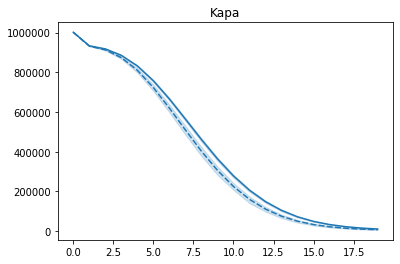

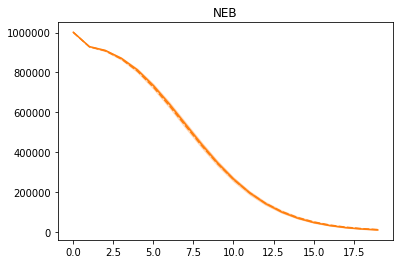

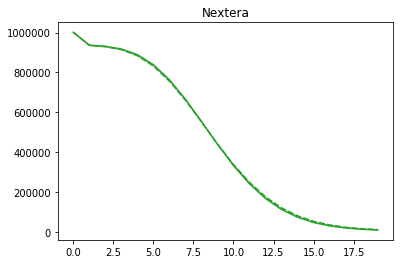

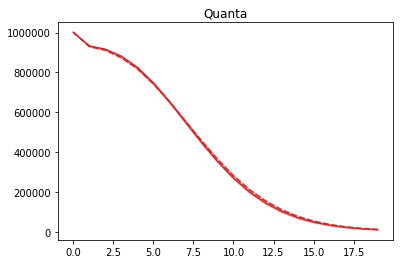

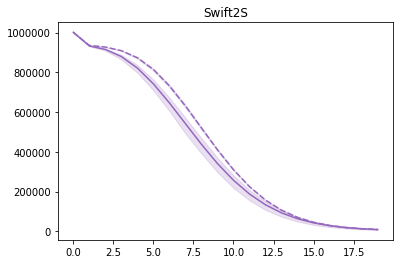

In [15]:
for kit in counts_medium.Kit.cat.categories:
    plt.figure()
    sns.lineplot(x='Coverage', y='CumulativeNumReads', hue='Kit', style="Conc",
                 data=counts_medium[counts_medium.Kit == kit], legend=False)
    plt.ylabel("")
    plt.xlabel("")
    plt.title(kit)
    plt.savefig("presentation/coverage_deeptools_{}.pdf".format(kit))

## Fragment lengths

In [16]:
#insertSizeDatas = [pd.read_csv(q) for q in ["50_deeptools_summary/insertSize_all_aa_100ng.txt", "50_deeptools_summary/insertSize_all_aa_10ng.txt"]]
insertSizeDatas = [pd.read_csv(
                        "50_deeptools_summary/insertSize_all_aa_{}.txt".format(conc),
                        sep="\t", skiprows=1
                        ).assign(Conc=conc)
                   for conc in ["10ng", "100ng"]]

insertSizeData = pd.concat(insertSizeDatas)
insertSizeData[['Kit', 'Replicate']] = insertSizeData.Sample.str.extract(r"30_downsample/([a-zA-Z0-9]+)-100?ng-([1234])-aa_DS_MD\.bam")
shorterInsertSize = insertSizeData[insertSizeData.Size < 800]

In [17]:
shorterInsertSize.head()

,Size,Occurrences,Sample,Conc,Kit,Replicate
0,0,201,30_downsample/Kapa-10ng-1-aa_DS_MD.bam,10ng,Kapa,1
1,2,2,30_downsample/Kapa-10ng-1-aa_DS_MD.bam,10ng,Kapa,1
2,3,1,30_downsample/Kapa-10ng-1-aa_DS_MD.bam,10ng,Kapa,1
3,4,1,30_downsample/Kapa-10ng-1-aa_DS_MD.bam,10ng,Kapa,1
4,5,2,30_downsample/Kapa-10ng-1-aa_DS_MD.bam,10ng,Kapa,1


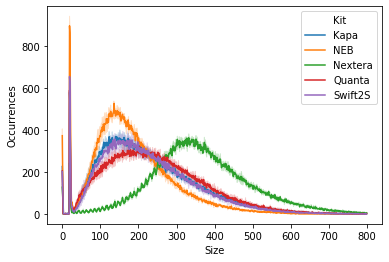

In [18]:
plt.figure()
sns.lineplot(x="Size", y="Occurrences", hue="Kit", data=shorterInsertSize[shorterInsertSize.Conc == "100ng"])
plt.savefig("presentation/insert_size_deeptools_100ng.pdf")

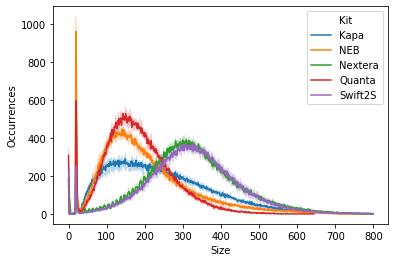

In [19]:
plt.figure()
sns.lineplot(x="Size", y="Occurrences", hue="Kit", data=shorterInsertSize[shorterInsertSize.Conc == "10ng"])
plt.savefig("presentation/insert_size_deeptools_10ng.pdf")

## Summary NPZ file

In [20]:
import numpy as np

In [21]:
data = np.load('50_deeptools_summary/summary_aa_all.npz')

In [22]:
print(list(data))

['labels', 'matrix']


In [23]:
print(data['labels'][:5])

['Swift2S-10ng-2-aa.bw' 'Kapa-10ng-1-aa.bw' 'NEB-100ng-2-aa.bw'
 'NEB-10ng-4-aa.bw' 'NEB-10ng-1-aa.bw']


In [24]:
print(data['matrix'].shape)

(310114, 40)


## GC Content

In [25]:
mat = np.loadtxt("40_gc_bias/Kapa-100ng-3-aa.txt")

In [26]:
mat.shape

(201, 3)

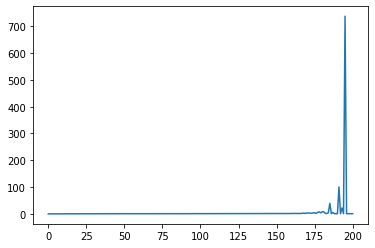

In [27]:
plt.plot(mat[:, 2])